# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение общей информации. 

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("real_estate_data.csv" , sep = "\t" )

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

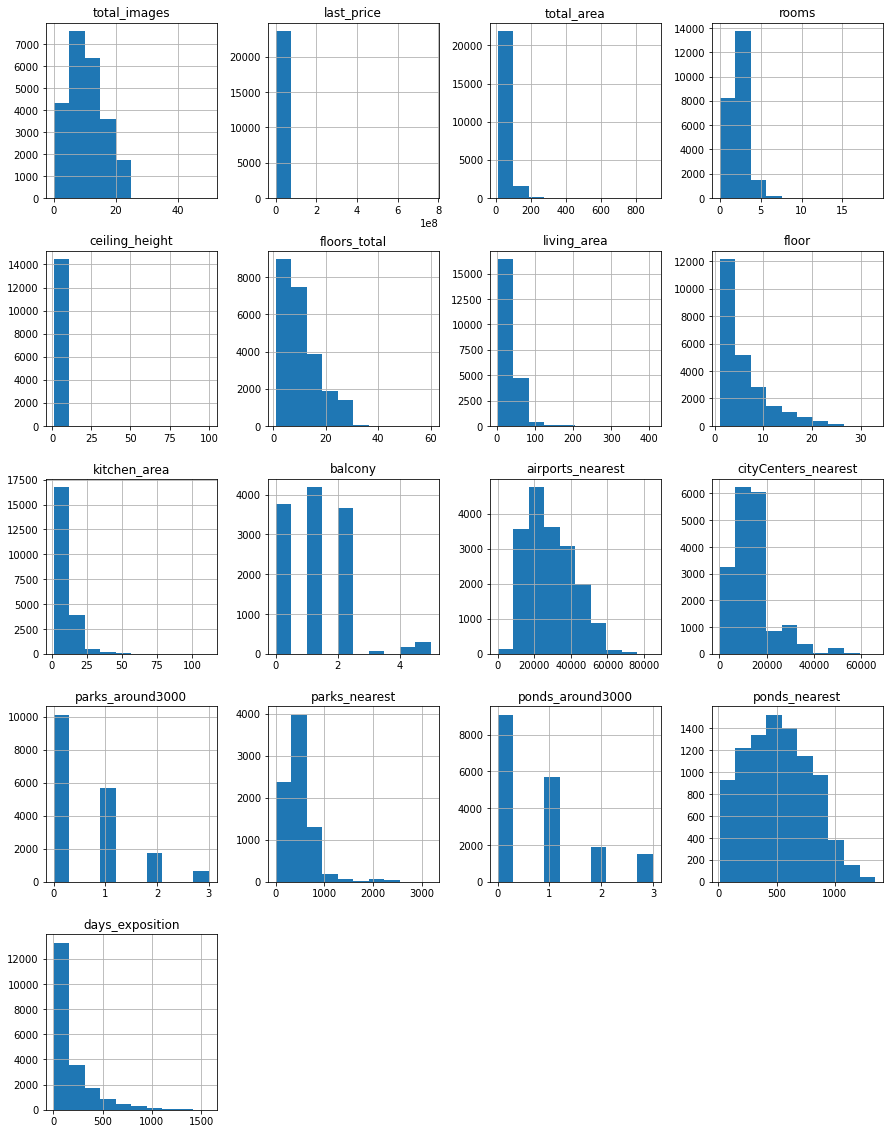

In [2]:
data.info()
data.hist(figsize=(15, 20));

**Вывод**

Прочитали файл
<br>
Необходимо изменить тип данных в столбцах
<br>
Большое количество пропусков почти во всех 
столбцах.
<br>
Приведем названия столбцов к единому стилю.

### Предобработка данных

In [3]:

#приведем названия стобцов к единому виду
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заполнение пропусков**

In [4]:
#Заменяю все NaN в столбце "is_apartment" на False
pd.set_option("max_columns" , None)
data["is_apartment"] = data["is_apartment"].fillna(value = False)

In [5]:
#Заменяю все NaN в столбце ""balcony"" на 0
data["balcony"] = data["balcony"].fillna(value = 0)
#Во всех остальных колонках нету информации для их заполнения, так что оставляю


In [6]:
#Заменяю NaN в колонки ceiling_height, исходя из дальности расположения квартиры от центра
#сначала уберу анамальные значения в потолках

def fix_ceiling(item):
    if (item is not None) and (item > 24):
        #print(item)
        return item / 10
    if (item is not None) and ((item > 8) or (item <= 2.4)):
        return None
    else:
        return item
data["ceiling_height"] = data["ceiling_height"].apply(fix_ceiling)
print(data["ceiling_height"].sort_values(ascending = False).unique())


[10.    8.    6.    5.8   5.6   5.5   5.3   5.2   5.    4.9   4.8   4.7
  4.65  4.5   4.45  4.4   4.37  4.3   4.25  4.2   4.19  4.15  4.14  4.1
  4.06  4.    3.98  3.95  3.93  3.9   3.88  3.87  3.86  3.85  3.84  3.83
  3.82  3.8   3.78  3.76  3.75  3.7   3.69  3.68  3.67  3.66  3.65  3.63
  3.62  3.6   3.59  3.58  3.57  3.56  3.55  3.54  3.53  3.52  3.51  3.5
  3.49  3.48  3.47  3.46  3.45  3.44  3.43  3.42  3.4   3.39  3.38  3.37
  3.36  3.35  3.34  3.33  3.32  3.31  3.3   3.29  3.28  3.27  3.26  3.25
  3.24  3.23  3.22  3.21  3.2   3.18  3.17  3.16  3.15  3.14  3.13  3.12
  3.11  3.1   3.09  3.08  3.07  3.06  3.05  3.04  3.03  3.02  3.01  3.
  2.99  2.98  2.97  2.96  2.95  2.94  2.93  2.92  2.91  2.9   2.89  2.88
  2.87  2.86  2.85  2.84  2.83  2.82  2.81  2.8   2.79  2.78  2.77  2.76
  2.75  2.74  2.73  2.72  2.71  2.7   2.69  2.68  2.67  2.66  2.65  2.64
  2.63  2.62  2.61  2.6   2.59  2.58  2.57  2.56  2.55  2.54  2.53  2.52
  2.51  2.5   2.49  2.48  2.47  2.46  2.45   nan]


**Создадим категории в завсисимости от удаленности от города:**

0-5км от центра - центр;
<br>
5-18км от центра - город;
<br>
больше 18км от центра - область.

In [7]:
def category_center(item):
    if (item is not None) and (item < 5000):
        return "центр"
    elif (item is not None) and (item >= 5000) and (item <= 18000):
        return "город"
    elif (item is not None) and (item > 18000):
        return "область"
    else:
        return None

data["category"] = data["city_centers_nearest"].apply(category_center)
data["city_centers_nearest"].sort_values().unique()
    

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

**Взависимости от категории заполним пропущенные значения в потолках**

In [8]:
group_by_category = data.groupby("category")["ceiling_height"].median()
items = data["category"].sort_values(ascending = False).unique()
items = np.delete(items , -1)
for item in items:
    data.loc[data["category"] == item , "ceiling_height"] = data.loc[data["category"] == item , "ceiling_height"].fillna(group_by_category[item])

data.isna().sum()    

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           2598
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
category                 5519
dtype: int64

**Причины, которые могли привести к пропускам в данных:**    
1)Пользователи не знают точную площадь, поэтому не пишут ее  
2)Так как больше всего продаются жилые помещения, gользователи часто не указывают тип помещения, если он просто жилой.  
3)Пользователи не указывают размер кухни, так как не знают его  
4)Если балконов не, то пользователи их не указывают.  
5)Пропуски во многих столбцах возникли из-за отсутствия информации на картах города.  
6)Технические ошибки во время сбора/выгрузки данных  


**Изменение типа данных**

К типу int приведем столбцы: 
1. 'last_price'
2. 'floors_total'		
3. 'balcony'
4. 'airports_nearest'	
5. 'city_centers_nearest'	 
6. 'parks_around_3000'	 
7. 'parks_nearest'	 
8. 'ponds_around_3000'	 
9. 'ponds_nearest'	 
10. 'days_exposition'	 


Округлим до 1го знака после запятой столбцы:
1. 'ceiling_height'	
2. 'living_area'
3. 'kitchen_area'
4. 'total_area'

In [11]:
#В инт
to_int = ['last_price','floors_total','balcony','airports_nearest','city_centers_nearest','parks_around_3000','parks_nearest','ponds_around_3000','ponds_nearest','days_exposition']

for item in to_int:
    data.loc[data[item].notnull() , item] = data.loc[data[item].notnull() , item].astype("int")
#Округляем до 1-го знака
to_round = ['ceiling_height','living_area','kitchen_area','total_area']

for item in to_round:
    data.loc[data[item].notnull() , item] = data.loc[data[item].notnull() , item].apply(lambda x: round(x,1))




    
    
    

Преведем столбец "first_day_exposition" к типу date

In [12]:
data["first_day_exposition"] = pd.to_datetime(data["first_day_exposition"] , format = "%Y-%m-%dT%H:%M:%S")


**last_price** - в целочисленный тип , отброшенная часть не будет влиять на значения;
<br>
**total_area** - округлим до 1го знака после запятой , отброшенная часть не будет влиять на значения;
<br>
**first_day_exposition** - даты в тип datetime;
<br>
**ceiling_height** - округлим до 1го знака после запятой (, отброшенная часть не будет влиять на значения;
<br>
**floors_total**, **balcony** бывают тольок целые значения, int;
<br>
**living_area**, **kitchen_area** - до 1 знака после запятой, , отброшенная часть не будет влиять на значения; 
<br>
**airports_nearest**, **city_centers_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest** -  переводим в int, отброшенная часть не будет влиять на значения;
<br>
**days_exposition** - бывают тольок целые значения, в int.

Явных дубликатов нет

In [13]:
data[data.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          0 non-null      int64         
 1   last_price            0 non-null      int64         
 2   total_area            0 non-null      float64       
 3   first_day_exposition  0 non-null      datetime64[ns]
 4   rooms                 0 non-null      int64         
 5   ceiling_height        0 non-null      float64       
 6   floors_total          0 non-null      float64       
 7   living_area           0 non-null      float64       
 8   floor                 0 non-null      int64         
 9   is_apartment          0 non-null      bool          
 10  studio                0 non-null      bool          
 11  open_plan             0 non-null      bool          
 12  kitchen_area          0 non-null      float64       
 13  balcony               0 non-null

**Неаявные дубликаты**

In [14]:
items = data["locality_name"].sort_values().unique()
items = np.delete(items , -1)
# print(len(items))

for i in range(len(items)):
    items[i] = items[i].replace("ё" , "е")

len(set(items))
#Приводим в порядок неявные дубликаты,меняем е на ё
data.loc[data["locality_name"].notnull() , "locality_name"] = data.loc[data["locality_name"].notnull() , "locality_name"].apply(lambda x: x.replace("ё" , "е"))
# len(data["locality_name"].unique())

items = data["locality_name"].sort_values().unique()
items = np.delete(items , -1)

words = ["поселок" , "городской" , "деревня" , "коттеджный" , "типа", "садовое", "товарищество", "село" , "городского"]
for i in range(len(items)):
    res1 = list(set(items[i].split()).difference(set(words)))
    for j in range(len(items)):
        if j != i:
            res2 = list(set(items[j].split()).difference(set(words)))
            if res2 == res1:
                print(items[i], " - ", items[j])
                
            
        
                   
               
    
        
        
    
    
    






Кудрово  -  деревня Кудрово
Любань  -  поселок Любань
Мурино  -  поселок Мурино
Никольское  -  село Никольское
городской поселок Большая Ижора  -  поселок городского типа Большая Ижора
городской поселок Лесогорский  -  поселок городского типа Лесогорский
городской поселок Мга  -  поселок городского типа Мга
городской поселок Назия  -  поселок городского типа Назия
городской поселок Павлово  -  поселок городского типа Павлово
городской поселок Павлово  -  село Павлово
городской поселок Рощино  -  поселок городского типа Рощино
городской поселок Советский  -  поселок городского типа Советский
городской поселок Федоровское  -  деревня Федоровское
деревня Гарболово  -  поселок Гарболово
деревня Зимитицы  -  поселок Зимитицы
деревня Калитино  -  поселок Калитино
деревня Кудрово  -  Кудрово
деревня Рабитицы  -  поселок Рабитицы
деревня Федоровское  -  городской поселок Федоровское
деревня Щеглово  -  поселок Щеглово
коттеджный поселок Лесное  -  поселок Лесное
поселок Гарболово  -  деревня Г

**Написал алгоритм, который помог выделить неявные дубликаты в столбце "locality_name"
Но посмотрел по карте, и оказывается, что например поселок Зимитци и деревня Зимитцы это разные вещи, и так далее, так что исправлю только неявные дубликаты вида: городской поселок Павлово  -  поселок городского типа Павлово**

In [15]:
# городской поселок Большая Ижора  -  поселок городского типа Большая Ижора
# городской поселок Лесогорский  -  поселок городского типа Лесогорский
# городской поселок Мга  -  поселок городского типа Мга
# городской поселок Назия  -  поселок городского типа Назия
# городской поселок Павлово  -  поселок городского типа Павлово
# городской поселок Павлово  -  село Павлово
# городской поселок Рощино  -  поселок городского типа Рощино
# городской поселок Советский  -  поселок городского типа Советский

print(len(data["locality_name"].sort_values().unique()))

def remove_implicit_duplicates(item):
    if item == "городской поселок Большая Ижора":
        return "поселок городского типа Большая Ижора"
    elif item == "городской поселок Лесогорский":
        return "поселок городского типа Лесогорский"
    elif item == "городской поселок Мга":
        return "поселок городского типа Мга"
    elif item == "городской поселок Павлово":
        return "поселок городского типа Павлово"
    elif item == "городской поселок Рощино":
        return "поселок городского типа Рощино"
    elif item == "городской поселок Назия":
        return "поселок городского типа Назия"
    elif item == "городской поселок Советский":
        return "поселок городского типа Советский"
    else:
        return item
data.loc[data["locality_name"].notnull() , "locality_name"] = data.loc[data["locality_name"].notnull() , "locality_name"].apply(remove_implicit_duplicates)
print(len(data["locality_name"].sort_values().unique()))


    
    

331
324


In [16]:
#Проверка
items = data["locality_name"].sort_values().unique()
items = np.delete(items , -1)

for i in range(len(items)):
    res1 = list(set(items[i].split()).difference(set(words)))
    for j in range(len(items)):
        if j != i:
            res2 = list(set(items[j].split()).difference(set(words)))
            if res2 == res1:
                print(items[i], " - ", items[j])

Кудрово  -  деревня Кудрово
Любань  -  поселок Любань
Мурино  -  поселок Мурино
Никольское  -  село Никольское
городской поселок Федоровское  -  деревня Федоровское
деревня Гарболово  -  поселок Гарболово
деревня Зимитицы  -  поселок Зимитицы
деревня Калитино  -  поселок Калитино
деревня Кудрово  -  Кудрово
деревня Рабитицы  -  поселок Рабитицы
деревня Федоровское  -  городской поселок Федоровское
деревня Щеглово  -  поселок Щеглово
коттеджный поселок Лесное  -  поселок Лесное
поселок Гарболово  -  деревня Гарболово
поселок Зимитицы  -  деревня Зимитицы
поселок Калитино  -  деревня Калитино
поселок Лесное  -  коттеджный поселок Лесное
поселок Любань  -  Любань
поселок Мурино  -  Мурино
поселок Рабитицы  -  деревня Рабитицы
поселок Рябово  -  поселок городского типа Рябово
поселок Щеглово  -  деревня Щеглово
поселок городского типа Павлово  -  село Павлово
поселок городского типа Приладожский  -  садовое товарищество Приладожский
поселок городского типа Рахья  -  садовое товарищество Ра

**Анамальные значения**
<br>
Я исправил анамальные значения в колонке "ceiling_height" ранее

In [17]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,category
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.8,2017-03-21,3,3.7,5.0,73.3,3,False,False,False,13.8,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,центр
23695,14,3100000,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,False,False,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,None
23696,18,2500000,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
23697,13,11475000,76.8,2017-03-28,2,3.0,17.0,NaN,12,False,False,False,23.3,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,город


Проверяю анамальные значения

------------ total_images ------------
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64
------------ last_price ------------
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
------------ total_area ------------
count    23699.000000
mean        60.348694
std         35.654068
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
------------ first_day_exposition ------------
count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dty

/tmp/ipykernel_178/2505359357.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data[item].describe())


count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64
------------ ponds_around_3000 ------------
count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64
------------ ponds_nearest ------------
count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64
------------ days_exposition ------------
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
------------ category ------------
c

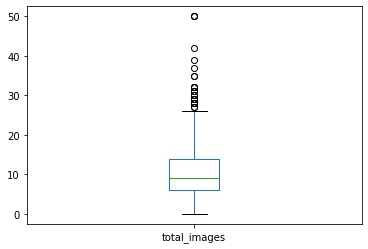

------------ last_price ------------


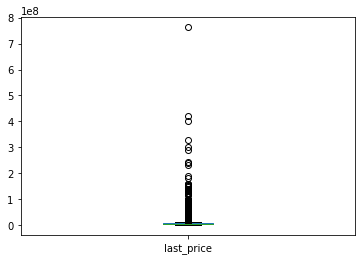

------------ total_area ------------


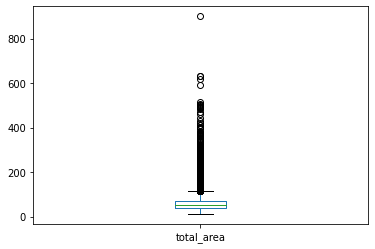

------------ rooms ------------


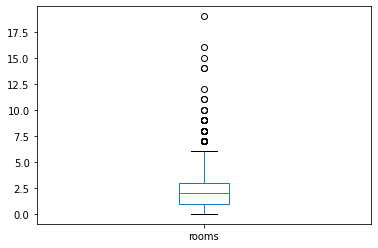

------------ ceiling_height ------------


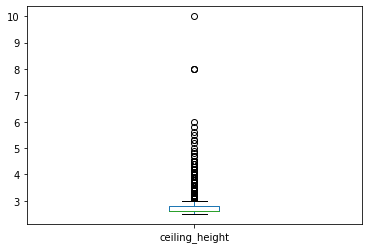

------------ floors_total ------------


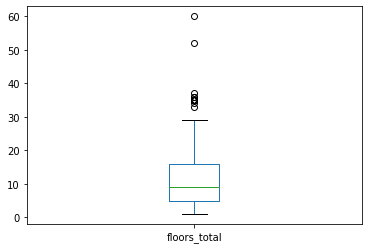

------------ living_area ------------


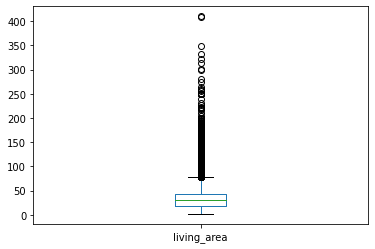

------------ floor ------------


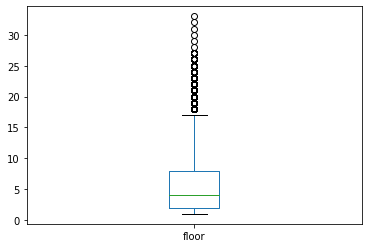

------------ kitchen_area ------------


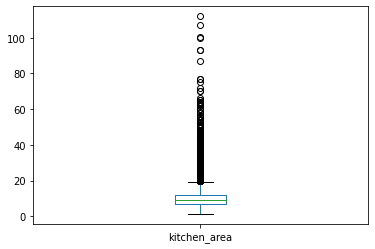

------------ balcony ------------


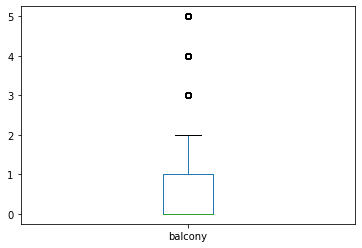

------------ airports_nearest ------------


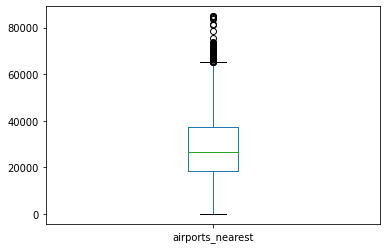

------------ city_centers_nearest ------------


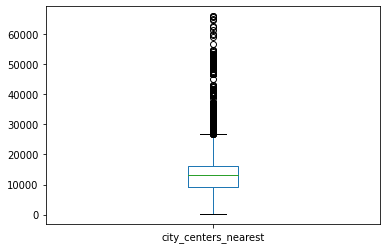

------------ parks_around_3000 ------------


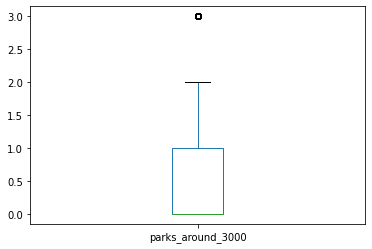

------------ parks_nearest ------------


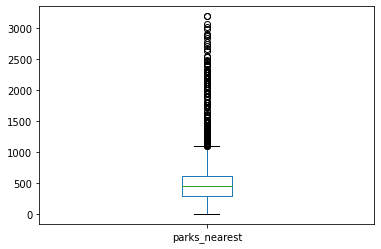

------------ ponds_around_3000 ------------


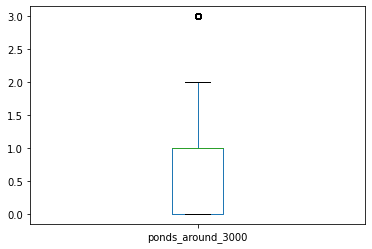

------------ ponds_nearest ------------


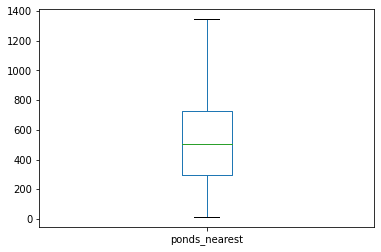

------------ days_exposition ------------


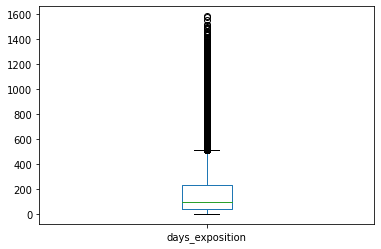

In [18]:
items = data.columns
for item in items:
    print("------------" , item , "------------")
    print(data[item].describe())
    
import matplotlib.pyplot as plt


items = np.delete(items , [3,9,10,11,14])
items = np.delete(items , -1)
items

for item in items:
    print("------------" , item , "------------")
    data[item].plot(kind='box')
    plt.show()


Удаляю анамальные значения

In [19]:
data = data.drop(index = data.loc[data["total_area"] == 900].index)
for i in range(2):
    data = data.drop(index = data.loc[data["last_price"] == data["last_price"].max()].index)
for i in range(2):
    data = data.drop(index = data.loc[data["ceiling_height"] == data["ceiling_height"].max()].index)
for i in range(2):
    data = data.drop(index = data.loc[data["floors_total"] == data["floors_total"].max()].index)




------------ total_images ------------


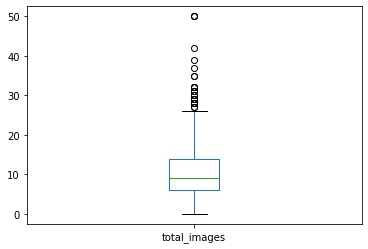

------------ last_price ------------


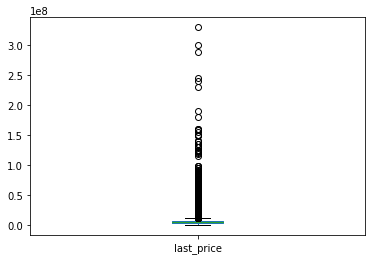

------------ total_area ------------


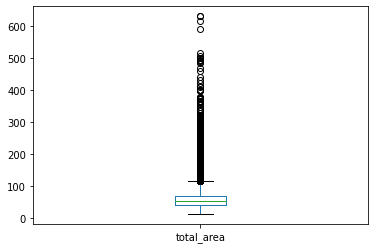

------------ rooms ------------


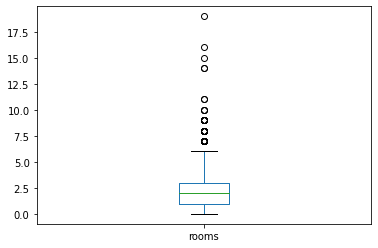

------------ ceiling_height ------------


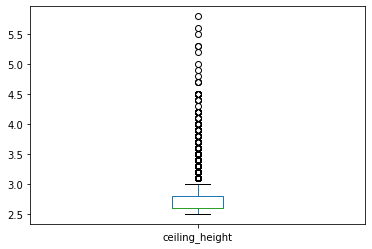

------------ floors_total ------------


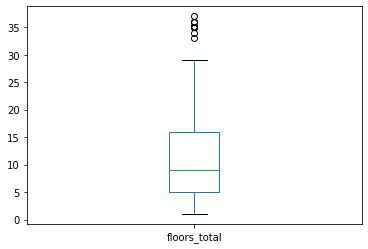

------------ living_area ------------


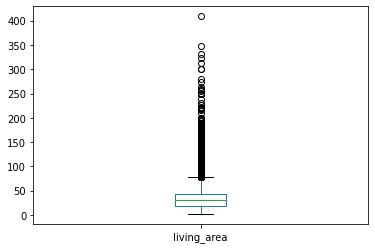

------------ floor ------------


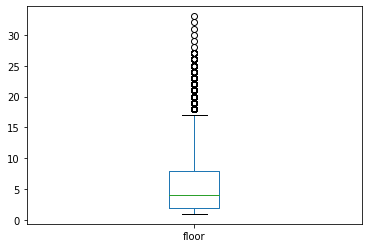

------------ kitchen_area ------------


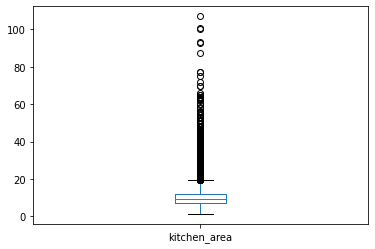

------------ balcony ------------


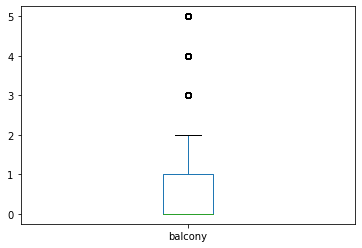

------------ airports_nearest ------------


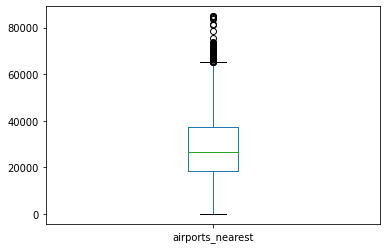

------------ city_centers_nearest ------------


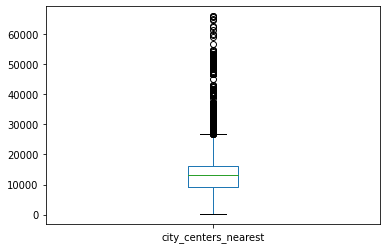

------------ parks_around_3000 ------------


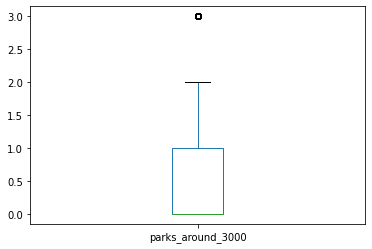

------------ parks_nearest ------------


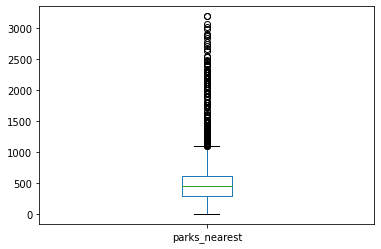

------------ ponds_around_3000 ------------


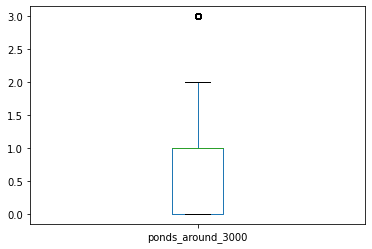

------------ ponds_nearest ------------


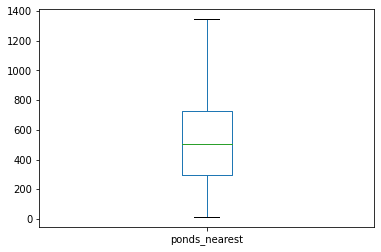

------------ days_exposition ------------


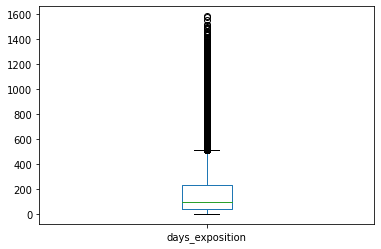

In [20]:
data = data.drop(index = data.loc[data["ceiling_height"] == data["ceiling_height"].max()].index)
for item in items:
    print("------------" , item , "------------")
    data[item].plot(kind='box')
    plt.show()

**Вывод**

Сделал предобработку данных:
<br>
Изменил тип данных
<br>
привел имена столбцов к единому стилю
<br>
Обработал явные и неявные дубликаты (написал для это программу)
<br>
Обработал пропуски.

### Посчитаю и добавлю в таблицу новые столбцы

Добавлю в таблицу новые столбцы со следующими параметрами:
1) цена одного квадратного метра;
2) день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3) месяц публикации объявления;
4) год публикации объявления;
5) тип этажа квартиры (значения — «первый», «последний», «другой»);
6) расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [22]:
#цена одного квадратного метра;
data["price_of_one_m2"] = data["last_price"] / data["total_area"]
data.loc[data["price_of_one_m2"].notnull() , "price_of_one_m2"] = data.loc[data["price_of_one_m2"].notnull() , "price_of_one_m2"].apply(lambda x: round(x,1))

#код дня недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data["day_of_public"] = data["first_day_exposition"].apply(lambda x: x.day_name())
def koding_day(item):
    if item == "Monday":
        return 0
    elif item == "Tuesday":
        return 1
    if item == "Wednesday":
        return 2
    if item == "Thursday":
        return 3
    if item == "Friday":
        return 4
    if item == "Saturday":
        return 5
    if item == "Sunday":
        return 6
data["day_of_public"] = data["day_of_public"].apply(koding_day)

#месяц публикации объявления
data["month_of_public"] = data["first_day_exposition"].apply(lambda x: x.month_name())

#год публикации объявления;
data["year_of_public"] = data["first_day_exposition"].apply(lambda x: x.year)

#тип этажа квартиры (значения — «первый», «последний», «другой»);
def coding_floors(items):
    if items["floor"] == 1:
        return "первый"
    elif items["floor"] == items["floors_total"]:
        return "последний"
    else:
        return "другой"

data["floor_type"] = data.loc[data["floors_total"].notnull()].apply(coding_floors , axis = 1)

#расстояние до центра города в километрах и округлите до целых значений.
data["city_centers_nearest_km"] = data.loc[data["city_centers_nearest"].notnull() , "city_centers_nearest"].apply(lambda x: int(x / 1000))

data

        

    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,category,price_of_one_m2,day_of_public,month_of_public,year_of_public,floor_type,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город,120370.4,3,March,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.6,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область,82920.8,1,December,2018,первый,18.0
2,10,5196000,56.0,2015-08-20,2,2.6,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город,92785.7,3,August,2015,другой,13.0
3,0,64900000,159.0,2015-07-24,3,2.6,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город,408176.1,4,July,2015,другой,6.0
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город,100000.0,1,June,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.8,2017-03-21,3,3.7,5.0,73.3,3,False,False,False,13.8,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,центр,72496.3,1,March,2017,другой,4.0
23695,14,3100000,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,False,False,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,None,52542.4,0,January,2018,другой,NaN
23696,18,2500000,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,44091.7,6,February,2018,первый,NaN
23697,13,11475000,76.8,2017-03-28,2,3.0,17.0,NaN,12,False,False,False,23.3,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,город,149414.1,1,March,2017,другой,10.0


**Вывод**
<br>
Добавил необходимые столбцы и произвел расчеты по ним.
<br>
Из-за пропусков в исходных данных, в добавленных столбцах также есть пропуски.
<br>
В столбце floor_category для 85 строк категория этажа могла определиться неверно, но это мало по сравнению с общим колличеством,  на результаты исследования они не повлияют.

### Исследовательский анализ данных

#### Изучить параметры:

Изучить параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

**Общая площадь**

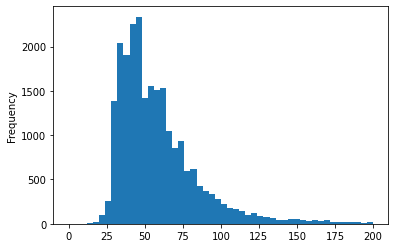

In [23]:
import matplotlib.pyplot as plt

# data["total_area"].boxplot()
# plt.show()bar, barstacked, step, stepfilled

data['total_area'].plot(kind='hist' , bins = 50 , range=(0, 200))
# plt.xlim(0,200)
plt.show()

Больше всего квартир с площадью в районе 50 м^2, также много квартир от 25 м^2 до 75, замечается резкий спад квартир с площадью меньше 25 м^2.График похож на нормальное распределение.

**Жилая площадь**

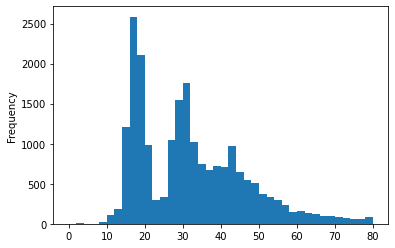

In [24]:
data['living_area'].plot(kind='hist' , bins = 40 , range=(0, 80))
plt.show()

Больше всего квартир с жилой площадью в районе 18 м^2, также много квартир с жилой площадью в районе 30 м^2, замечается резкий спад квартир с жилой площадью больше 19 м^2, а далее резкий рост с площадью более 25 м^2.Из-за резкого спада и роста график не похож на нормальное распределение.Предпологаю, что по каким-либо причинам не хватает информации по квартирам с жилой площадью от 20 до 26 м^2. Также возможно это связано со студиями.

**Площадь кухни**

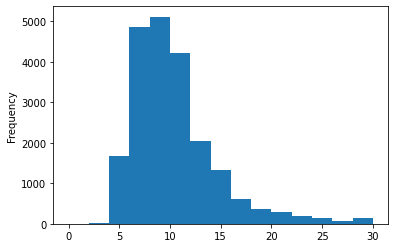

In [25]:
data['kitchen_area'].plot(kind='hist' , bins = 15 , range=(0, 30))
plt.show()

Больше всего квартир с площадью кухни в районе 10 м^2.График похож на нормальное распределение.

**Цена объекта**

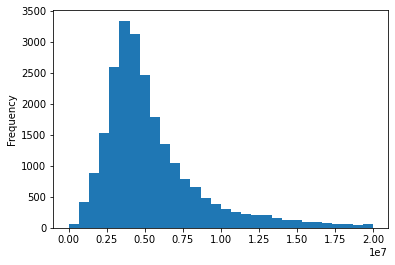

In [26]:
data['last_price'].plot(kind='hist', range=(0, 20000000) , bins = 30)
plt.show()

Больше всего квартир с ценой в районе 5 млн рублей. График похож на нормальное распределение.

**Количество комнат**

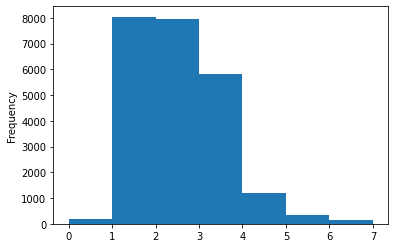

In [27]:
data['rooms'].plot(kind='hist', range=(0, 7) , bins = 7)
plt.show()

Больше всего квартир с 1-2 комнатами. График похож на нормальное распределение.

**Высота потолков**

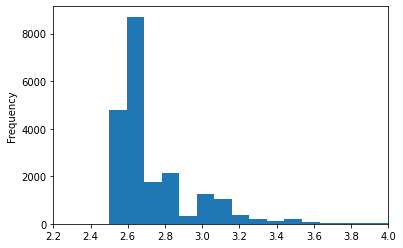

In [28]:
data['ceiling_height'].plot(kind='hist' , bins = 35)
plt.xlim(2.2,4)
plt.show()

Больше всего квартир с потолками высотой в районе 2,65 метра. График похож на нормальное распределение.

**Этаж квартиры**

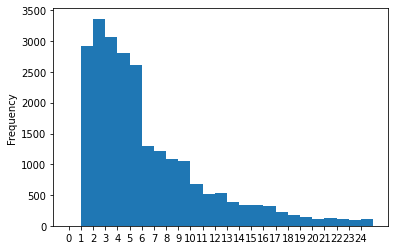

In [29]:
data['floor'].plot(kind='hist', range=(0, 25) , bins = 25)
plt.xticks(np.arange(0, 25, 1.0))
plt.show()

Больше всего квартир находятся на 2-4 этажах. График похож на нормальное распределение.

**Тип этажа квартиры («первый», «последний», «другой»)**

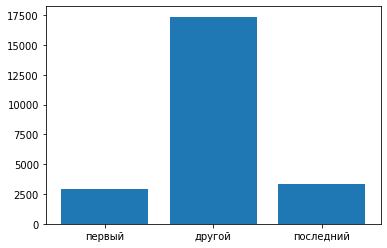

In [30]:

unique_value , counts = np.unique(data.loc[data['floor_type'].notnull() , "floor_type"],return_counts = True)

unique_value[0] , unique_value[1] = unique_value[1] , unique_value[0]
counts[0] , counts[1] = counts[1] , counts[0]

plt.bar(unique_value , counts)
plt.show()



График похож на нормальное распределение.

**Общее количество этажей в доме**

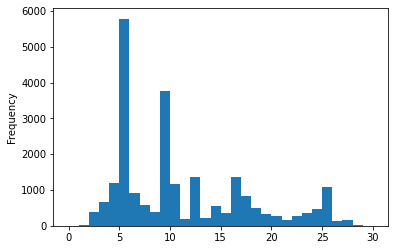

In [31]:
data['floors_total'].plot(kind='hist', range=(0, 30) , bins = 30)
plt.show()

Из графика видно, что в Питере больше всего домов с 5ю и 9ю этажами, как и по всей России, так что график правдивый.

**Расстояние до центра города в метрах**

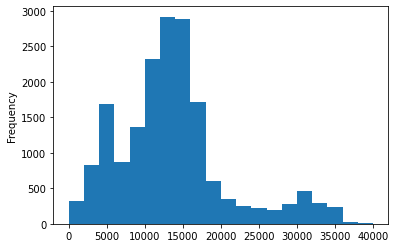

In [32]:
data['city_centers_nearest'].plot(kind='hist', range=(0, 40000) , bins = 20)
plt.show()

Больше всего квартир находится на расстоянии от 10км до 15км от центра города. График похож на нормальное распределение.

**Расстояние до ближайшего парка**

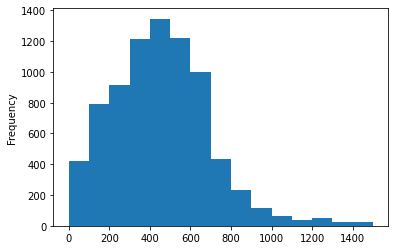

In [33]:

data['parks_nearest'].plot(kind='hist', range=(0, 1500) , bins = 15)
plt.show()

Больше всего квартир находится на расстоянии 400м от ближайшего парка. График похож на нормальное распределение.

**Расстояние до ближайшего аэропорта**

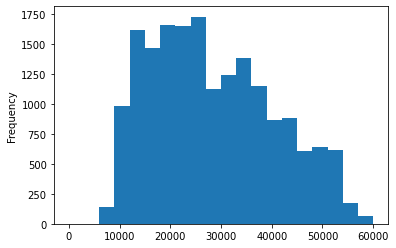

In [34]:
data['airports_nearest'].plot(kind='hist', range=(0, 60000) , bins = 20)
plt.show()

Больше всего квартир находится на расстоянии 20-25 км от ближайшего аэропорта. График похож на нормальное распределение.

**День публикации объявления**

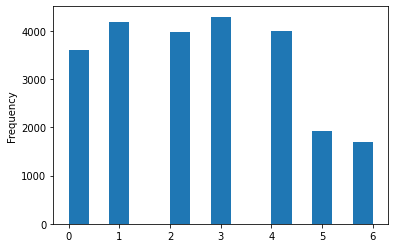

In [35]:

data['day_of_public'].plot(kind='hist', range=(0, 6) , bins = 15)
plt.xticks(np.arange(0, 7, 1.0))
plt.show()

Больше всего квартир публикуются в буднии дни, на выходных меньше, так как люди скорее всего отдыхают. График похож на нормальное распределение.

**Месяц публикации объявления**

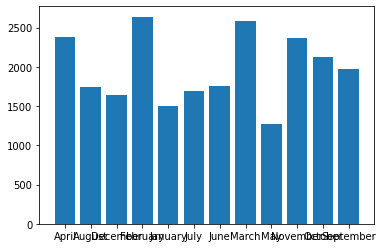

In [36]:
unique_value , counts = np.unique(data.loc[data['month_of_public'].notnull() , "month_of_public"],return_counts = True)

# print(unique_value)
# print(counts)
# dictionary = dict(zip(unique_value , counts))
# print(dictionary)


plt.bar(unique_value , counts)
plt.rcParams["figure.figsize"] = (12,5.5)

plt.show()

Чаще всего публикуют объявления в Апреле,Феврале и Марте

#### Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

1) Постройте гистограмму.
<br>
2) Посчитайте среднее и медиану.
<br>
3) В ячейке типа markdown описать, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

count    20508.000000
mean       180.874976
std        219.748769
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


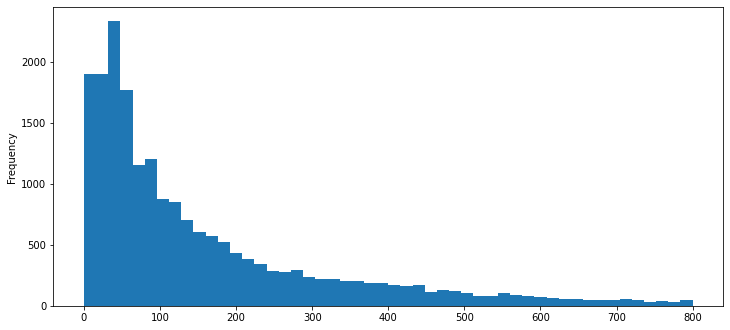

In [37]:
#Гистограмма
print(data["days_exposition"].describe())
data["days_exposition"].plot(kind = "hist" , range = (0 , 800) , bins = 50)
plt.show()


Среднее:  180.87497561927051
Медиана:  95.0


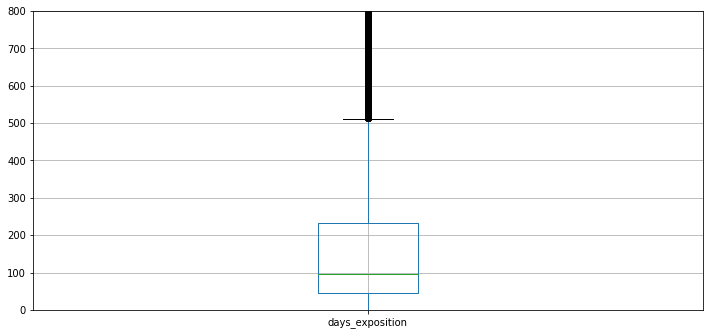

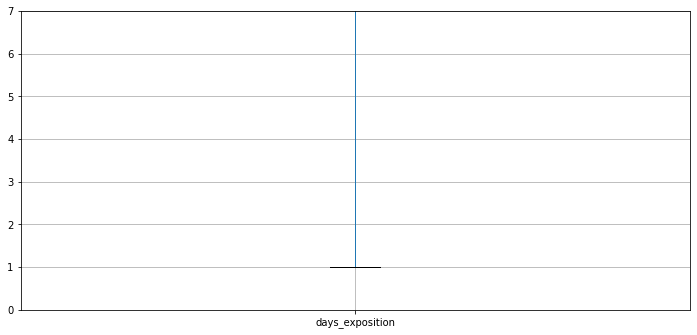

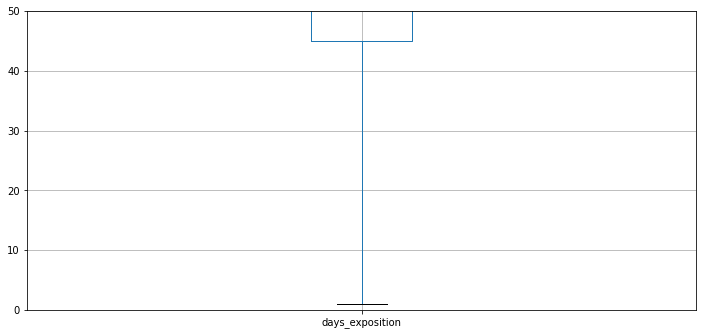

In [38]:
mean = data["days_exposition"].mean()
median = data["days_exposition"].median()
print("Среднее: " , mean)
print("Медиана: " , median)
data.boxplot(column = "days_exposition")
plt.ylim(0 , 800)
plt.show()

data.boxplot(column = "days_exposition")
plt.ylim(0 , 7)
plt.show()

data.boxplot(column = "days_exposition")
plt.ylim(0 , 50)
plt.show()

Обычно продажа квартиры занимает от 45 до 232 дней. Необычно долгими продажами можно считать продажи квартир, которые занимают более 500 дней. Быстрыми можно считать продажи, которые занимают менее 45 дней, однако такие продажи не являются редкостью.


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучить, зависит ли цена от:
1) общей площади;
<br>
2) жилой площади;
<br>
3) площади кухни;
<br>
4) количества комнат;
<br>
5) этажа, на котором расположена квартира (первый, последний, другой);
<br>
6) даты размещения (день недели, месяц, год).
<br>

Построиье графики, которые покажут зависимость цены от указанных выше параметров. 

**1) Зависит ли цена от общей площади**

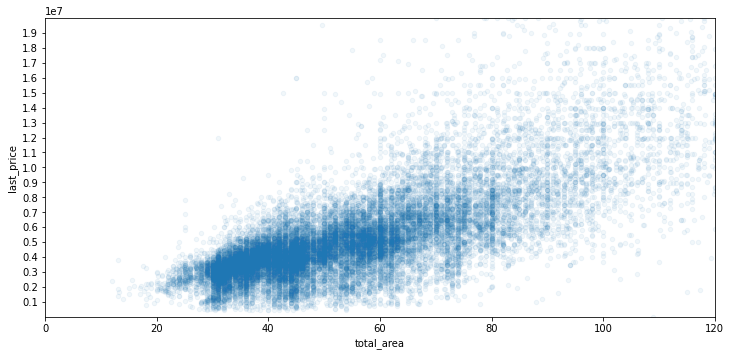

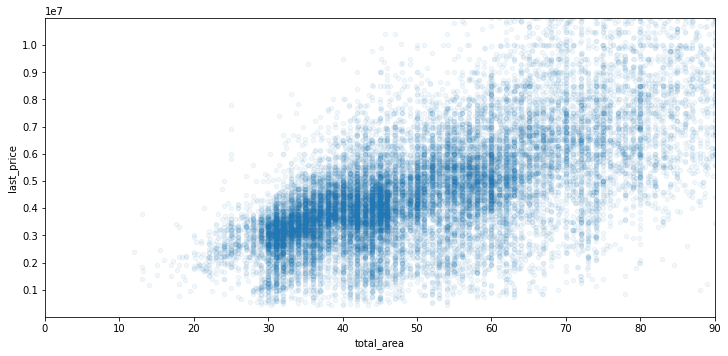

In [39]:
#data
data.plot(x='total_area', y='last_price', kind='scatter' , alpha = 0.06)
plt.xlim(0,120)
plt.ylim(0,20000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()

data.plot(x='total_area', y='last_price', kind='scatter' , alpha = 0.06)
plt.xlim(0,90)
plt.ylim(0,11000000)
plt.yticks(np.arange(1000000, 11000000, 1000000))
plt.show()

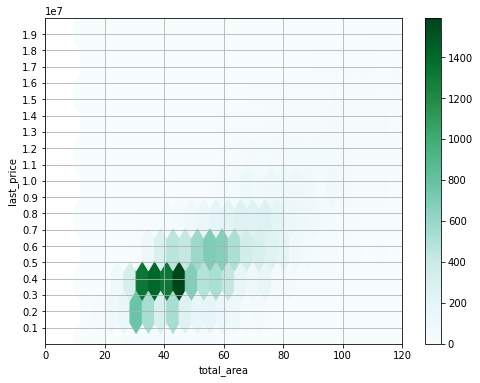

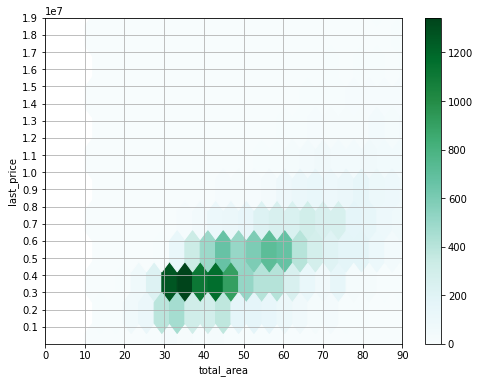

In [40]:
data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=150, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(0,120)
plt.ylim(0,20000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()


data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=160, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(0,90)
plt.ylim(0,11000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()

In [41]:
data['total_area'].corr(data['last_price'])


0.7071251299939724

Зависит

**Зависит ли цена от жилой площади**

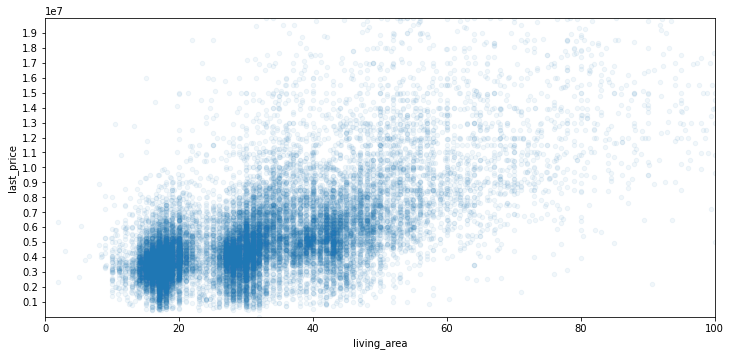

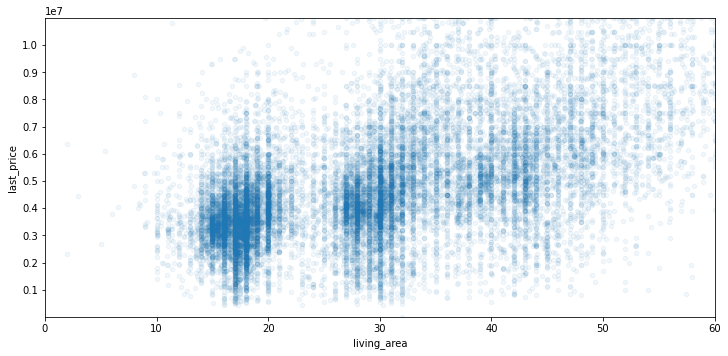

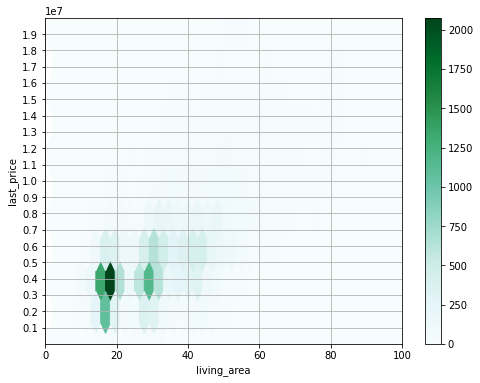

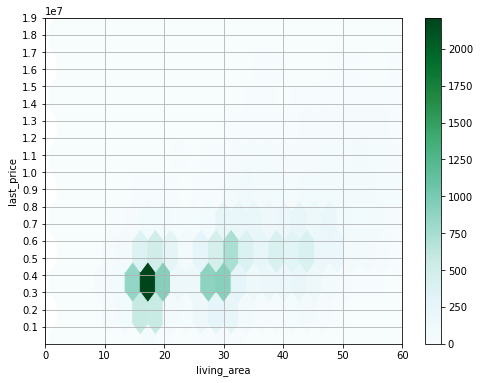

In [42]:
#data
data.plot(x='living_area', y='last_price', kind='scatter' , alpha = 0.06)
plt.xlim(0,100)
plt.ylim(0,20000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()

data.plot(x='living_area', y='last_price', kind='scatter' , alpha = 0.06)
plt.xlim(0,60)
plt.ylim(0,11000000)
plt.yticks(np.arange(1000000, 11000000, 1000000))
plt.show()

data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=150, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(0,100)
plt.ylim(0,20000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()


data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=160, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(0,60)
plt.ylim(0,11000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()

In [43]:
data['living_area'].corr(data['last_price'])


0.6168608474960667

Зависит

**Зависит ли цена от площади кухни**

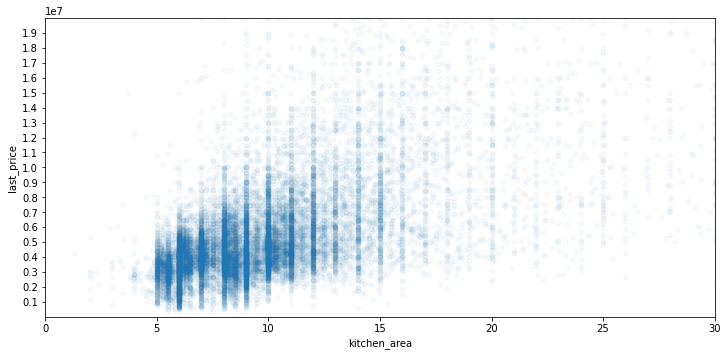

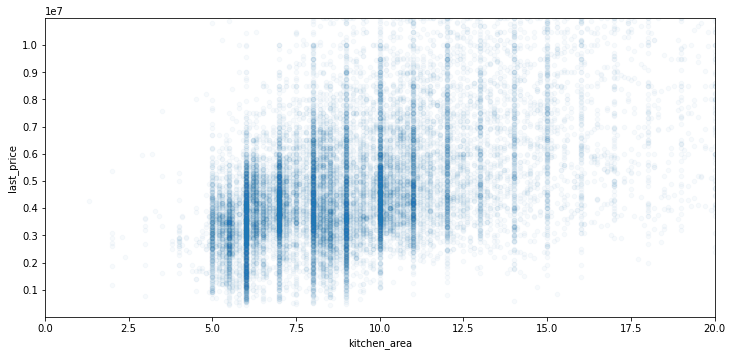

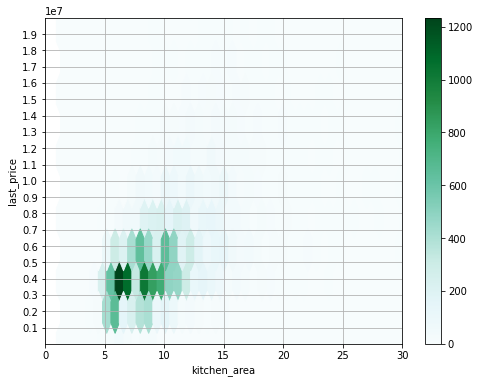

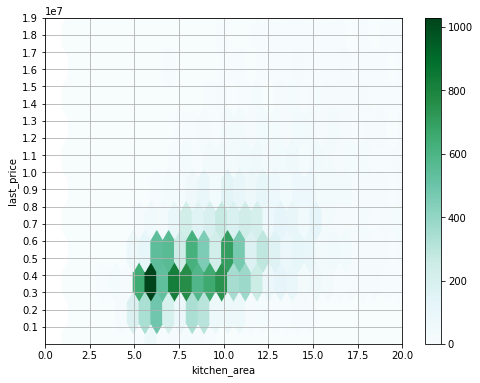

In [44]:
data.plot(x='kitchen_area', y='last_price', kind='scatter' , alpha = 0.03)
plt.xlim(0,30)
plt.ylim(0,20000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()

data.plot(x='kitchen_area', y='last_price', kind='scatter' , alpha = 0.03)
plt.xlim(0,20)
plt.ylim(0,11000000)
plt.yticks(np.arange(1000000, 11000000, 1000000))
plt.show()

data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=150, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(0,30)
plt.ylim(0,20000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()


data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=160, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(0,20)
plt.ylim(0,11000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()

In [45]:
data['kitchen_area'].corr(data['last_price'])

0.5309434088693653

Завсит, но меньше чем у прошлых параметров, возможно это связано с тем, что даже в дорогих квартирах кухни редко бывают больше 20м^2

**Зависит ли цена от количества комнат**

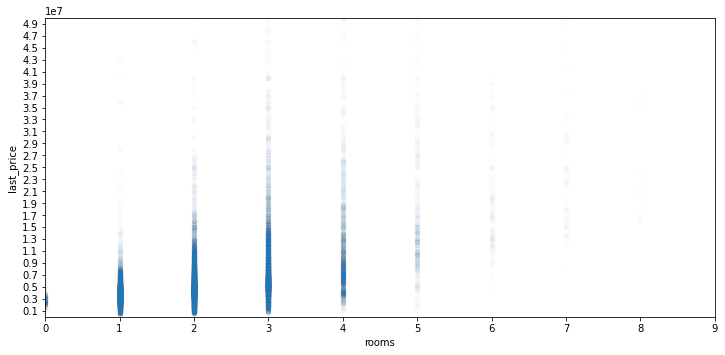

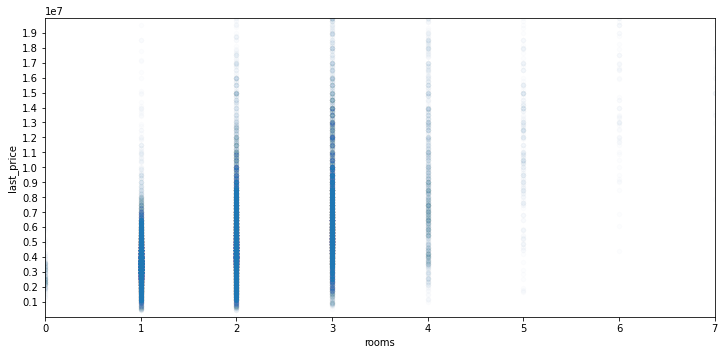

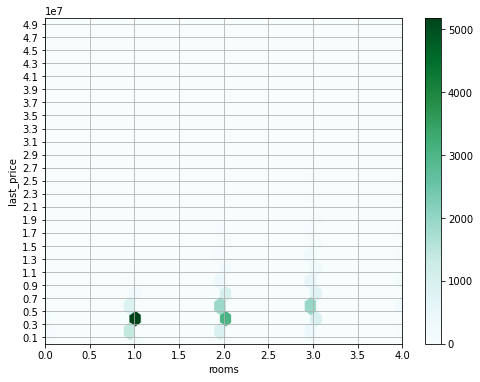

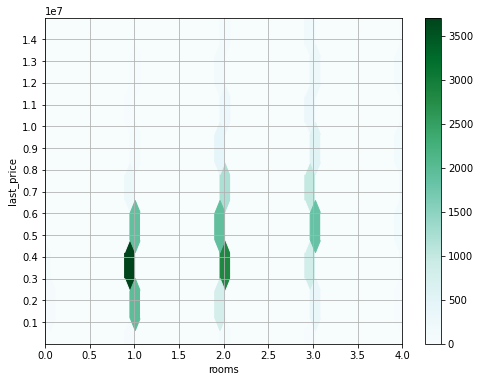

In [46]:
data.plot(x='rooms', y='last_price', kind='scatter' , alpha = 0.01)
plt.xlim(0,9)
plt.ylim(0,50000000)
plt.yticks(np.arange(1000000, 50000000, 2000000))
plt.show()

data.plot(x='rooms', y='last_price', kind='scatter' , alpha = 0.01)
plt.xlim(0,7)
plt.ylim(0,20000000)
plt.yticks(np.arange(1000000, 20000000, 1000000))
plt.show()

data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=150, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(0,4)
plt.ylim(0,50000000)
plt.yticks(np.arange(1000000, 50000000, 2000000))
plt.show()


data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=160, figsize=(8, 6), sharex=False, grid=True)
plt.xlim(0,4)
plt.ylim(0,15000000)
plt.yticks(np.arange(1000000, 15000000, 1000000))
plt.show()

In [47]:
data['kitchen_area'].corr(data['last_price'])

0.5309434088693653

Зависит

**Зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)**

In [48]:
data["floor_type"].unique()

array(['другой', 'первый', 'последний', nan], dtype=object)

In [49]:
items = data["floor_type"].unique()
items = np.delete(items , -1)
items[0] , items[1] = items[1] , items[0]
item = []
for i , val in enumerate(items , start = 1):
    item.append(i)
item = np.unique(item)

def Coding_floor_type(item):
    if item == "первый":
        return 1
    elif item == "другой":
        return 2
    elif item == "последний":
        return 3
data["Code_floor_type"] = data["floor_type"].apply(Coding_floor_type)
data.loc[data["Code_floor_type"].notnull() , "Code_floor_type"].unique()


array([2., 1., 3.])

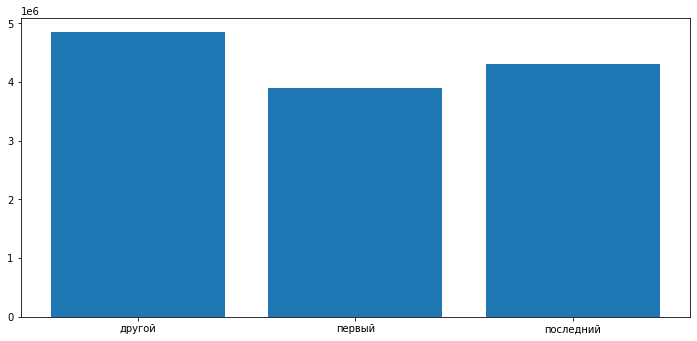

In [50]:


tmp = data.groupby("floor_type")["last_price"].agg(["median" , "mean"]).copy()
tmp = tmp.reset_index()
plt.bar(tmp["floor_type"] , tmp["median"])
plt.show()


Зависит , на 1м этаже квартира дешевле, чем на остальных, а на последнем дороже, чем на 1м, но дешевле чем на остальных

**Зависит ли цена от даты размещения (день недели).**

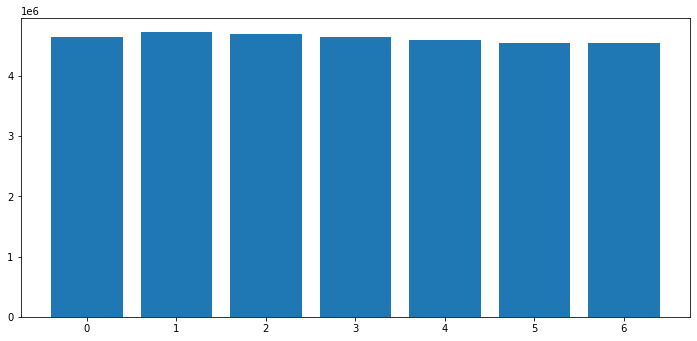

In [51]:

tmp = data.groupby("day_of_public")["last_price"].agg(["median" , "mean"]).copy()
tmp = tmp.reset_index()
plt.bar(tmp["day_of_public"] , tmp["median"])
plt.show()

Не зависит

**Зависит ли цена от даты размещения (Год).**

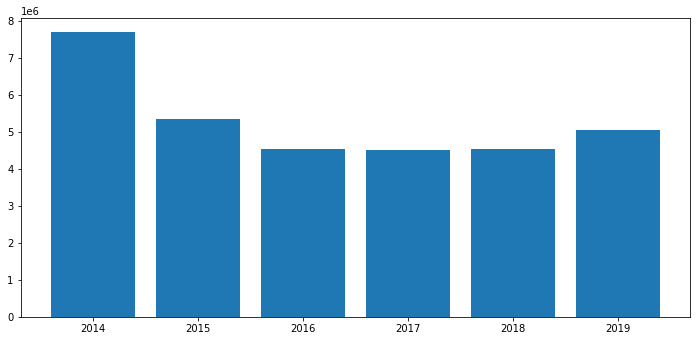

In [52]:


tmp = data.groupby("year_of_public")["last_price"].agg(["median" , "mean"]).copy()
tmp = tmp.reset_index()
plt.bar(tmp["year_of_public"] , tmp["median"])
plt.show()

Зависит

**Зависит ли цена от даты размещения (Месяц).**

In [53]:
# def Coding_month_of_public(item):
#     if item == "January":
#         return 1
#     elif item == "February":
#         return 2
#     elif item == "March":
#         return 3
#     elif item == "последний":
#         return 4
#     elif item == "последний":
#         return 5
#     elif item == "последний":
#         return 6
#     elif item == "последний":
#         return 7
#     elif item == "последний":
#         return 8
#     elif item == "последний":
#         return 9
#     elif item == "последний":
#         return 10
#     elif item == "последний":
#         return 11
#     elif item == "последний":
#         return 12


# words = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# def Coding_month_of_public(item):
#     for i , val in enumerate(words , start = 1):
#         if item == val:
#             return i
# data["Code_month_of_public"] = data["month_of_public"].apply(Coding_month_of_public)


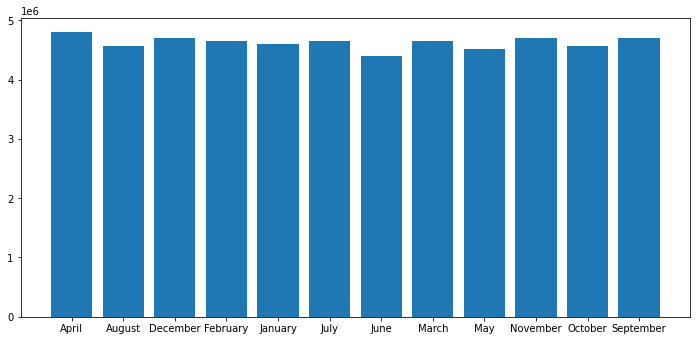

In [54]:


tmp = data.groupby("month_of_public")["last_price"].agg(["median" , "mean"]).copy()
tmp = tmp.reset_index()
plt.bar(tmp["month_of_public"] , tmp["median"])
plt.show()

Не зависит

#### Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [55]:
data.groupby("locality_name").count()["last_price"].sort_values(ascending = False).head(10)

locality_name
Санкт-Петербург      15714
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: last_price, dtype: int64

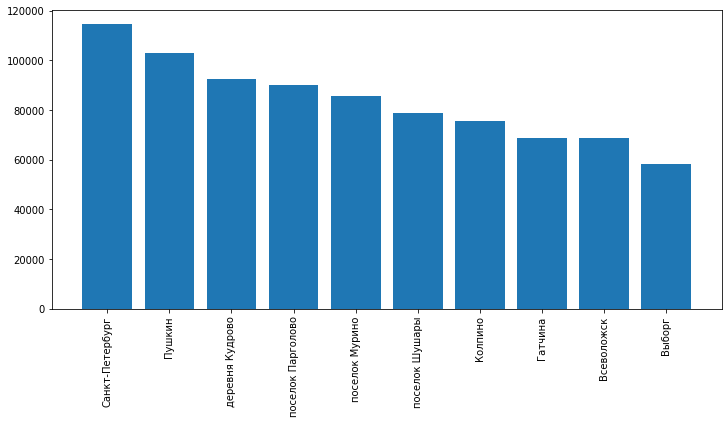

In [56]:
#data.groupby("locality_name")["price_of_one_m2"].mean().sort_values(ascending = False).head(10)
data_tmp = data.groupby("locality_name")["price_of_one_m2"].agg(["count" , "mean"]).sort_values(by = "count" , ascending = False).head(10)
data_tmp = data_tmp.sort_values(by = "mean" , ascending = False)
data_tmp["mean"] = data_tmp["mean"].apply(lambda x: round(x,1))
data_tmp = data_tmp.reset_index()
plt.bar(data_tmp["locality_name"] , data_tmp["mean"])
plt.xticks(rotation=90);

In [57]:
print("Населённый пункт с самой высокой средней стоимостью квадратного метра:" , data_tmp["mean"].iloc[0])
print("Населённый пункт с самой низкой средней стоимостью квадратного метра:" , data_tmp["mean"].iloc[-1])

Населённый пункт с самой высокой средней стоимостью квадратного метра: 114595.1
Населённый пункт с самой низкой средней стоимостью квадратного метра: 58141.8


#### Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

In [58]:
#data.loc[data["locality_name"] == "Санкт-Петербург" , "city_centers_nearest_km"].unique()
data_tmp_1 = data.loc[data["locality_name"] == "Санкт-Петербург"].groupby("city_centers_nearest_km")["last_price"].agg(["mean" , "median"]).copy()

In [59]:
difference_price = []
for i in range(len(data_tmp_1["mean"]) - 1):
    #print(data_tmp_1["mean"][i])
    difference_price.append(data_tmp_1["mean"][i] - data_tmp_1["mean"][i+1])  

In [60]:
print("средняя цена каждого километра: " , round(sum(difference_price) / len(difference_price) , 1))

средняя цена каждого километра:  676171.8


In [61]:
data_tmp_1 = data_tmp_1.reset_index()
data_tmp_1

,city_centers_nearest_km,mean,median
0,0.0,2.344232e+07,11750000
1,1.0,1.885085e+07,10835000
2,2.0,1.490470e+07,9500000
3,3.0,1.200909e+07,8500000
4,4.0,1.363202e+07,9900000
5,5.0,1.517110e+07,8910131
6,6.0,1.438911e+07,8005000
7,7.0,1.179471e+07,7500000
8,8.0,8.435474e+06,6500000
9,9.0,6.426055e+06,5000000


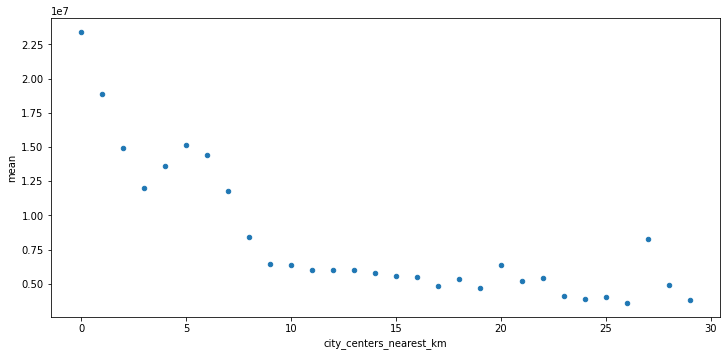

In [62]:
data_tmp_1.plot(x='city_centers_nearest_km', y='mean', kind='scatter')
plt.show()

In [63]:
data_tmp_1

,city_centers_nearest_km,mean,median
0,0.0,2.344232e+07,11750000
1,1.0,1.885085e+07,10835000
2,2.0,1.490470e+07,9500000
3,3.0,1.200909e+07,8500000
4,4.0,1.363202e+07,9900000
5,5.0,1.517110e+07,8910131
6,6.0,1.438911e+07,8005000
7,7.0,1.179471e+07,7500000
8,8.0,8.435474e+06,6500000
9,9.0,6.426055e+06,5000000


Средняя цена каждого километра:  676171.8

Чем ближе квартиры к центру города, тем дороже они стоят, однако есть резкие скачки в районе 5км, 20км и 27км, это может быть связано с тем, что на данных расстояниях находятся какеи-то жилые комплексы премиум класса, где квартиры могут стоить очень дорого

### Общий вывод

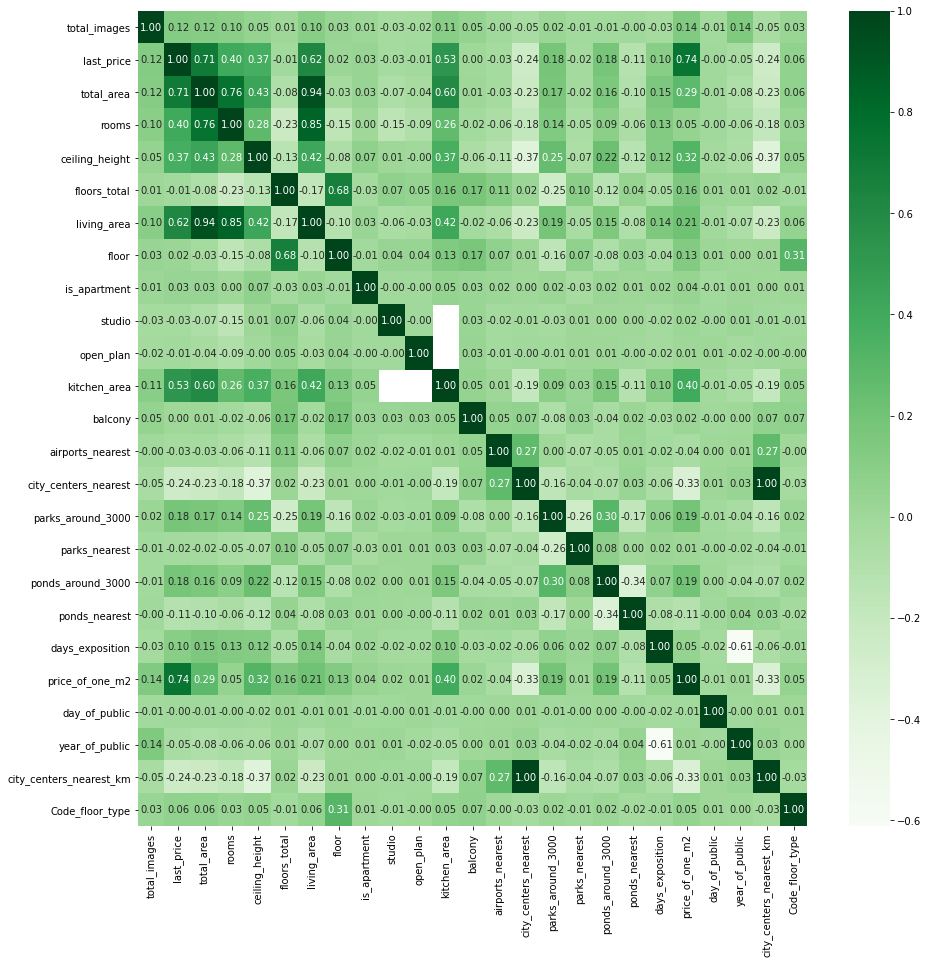

In [64]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="Greens", fmt='.2f')
plt.show()

<AxesSubplot:>

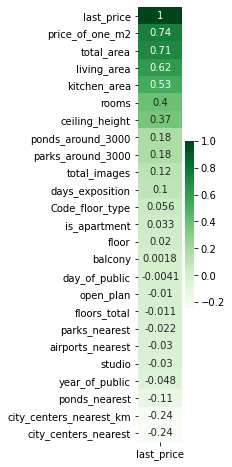

In [65]:
plt.figure(figsize=(1,8))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Greens", 
            annot=True)

В данном проекте мы предоставили причины, которые могли привести к пропускам в данных: 1)Пользователи не знают точную площадь, поэтому не пишут ее  2)Так как больше всего продаются жилые помещения, пользователи часто не указывают тип помещения, если он просто жилой.  3)Пользователи не указывают размер кухни, так как не знают его   4)Если балконов не, то пользователи их не указывают.  5)Пропуски во многих столбцах возникли из-за отсутствия информации на картах города.  6)Технические ошибки во время сбора/выгрузки данных.
 Далее изменили типы данных в столбцах и округлили значения в определенных колонках. Явных дубликатов не было обнаружено. Написали алгоритм, который помог выделить неявные дубликаты в столбце "locality_name" , исправили неявные дубликаты. Исправил анамальные значения в колонке «ceiling_height», а также вставил пропущенные значения. Добавил в таблицу новые столбцы: 1) цена одного квадратного метра 2) день недели публикации объявления 3) месяц публикации объявления 4) год публикации объявления 5) тип этажа квартиры 6) расстояние до центра города в километрах. Далее изучили ряд параметров: 1)общая площадь 2)жилая площадь 3)площадь кухни 4)цена объекта 5)количество комнат 6)высота потолков 7)этаж квартиры 8)тип этажа квартиры 9)общее количество этажей в доме 10)расстояние до центра города в метрах 11)расстояние до ближайшего аэропорта 12)расстояние до ближайшего парка 13)день и месяц публикации объявления. Далее определили, что обычно продажа квартиры занимает от 45 до 232 дней. Необычно долгими продажами можно считать продажи квартир, которые занимают более 500 дней. Быстрыми можно считать продажи, которые занимают менее 45 дней, однако такие продажи не являются редкостью.
<br>

**Наибольшее влияние на стоимость квартиры с прямой пропорциональностью оказывают:**
<br>
Метраж;<br> Цена за квадратный метр; <br>Жилая площадь и кухни; <br>Количество комнат
<br> 

**Наибольшее влияние на стоимость квартиры с прямой пропорциональностью оказывают:**
<br> 
Удаленность от центра
<br> 
Чем ближе квартира располагается к центру, тем выше ее стоимость, но есть особые случаи, когда на определенных килломаетрах цена вырастает резко. 

На 1м этаже квартира дешевле, чем на остальных, а на последнем дороже, чем на 1м, но дешевле чем на остальных

Населённый пункт с самой высокой средней стоимостью квадратного метра: 114595.1
Населённый пункт с самой низкой средней стоимостью квадратного метра: 58141.8

**Чек-лист готовности проекта**


- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод